https://machinelearningmastery.com/imbalanced-classification-model-to-detect-oil-spills/?__s=sedr9swwqoxuschybcvu

In [8]:
import pandas as pd

In [9]:
Xy = pd.read_csv( 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv' , header = None )

In [10]:
Xy.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [11]:
Xy.shape

(937, 50)

In [13]:
y = Xy.values[:,-1]

In [14]:
from collections import Counter

In [15]:
counter = Counter( y )

In [16]:
print( counter )

Counter({0.0: 896, 1.0: 41})


In [17]:
for k , v in counter.items() : 
    p =( v / len( y ) ) * 100
    print( 'class : {0} | n : {1} | p : {2}'.format( k , v , p ) )

class : 1.0 | n : 41 | p : 4.375667022411953
class : 0.0 | n : 896 | p : 95.62433297758804


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
y = LabelEncoder().fit_transform( y )

In [20]:
X = Xy

In [21]:
# colonne 49 : cible
X.drop( 49 , axis = 1 , inplace = True )

In [22]:
# colonne 22 : valeur unique
X.drop( 22 , axis = 1 , inplace = True )

In [23]:
# colonne 0 : identifiant
X.drop( 0 , axis = 1 , inplace = True )

In [24]:
X = X.values

# Dummy classifier

https://machinelearningmastery.com/how-to-develop-and-evaluate-naive-classifier-strategies-using-probability/

Naive classifiers :
- Predict a random class
- Predict a randomly selected class from the training dataset
- Predict the majority class from the training dataset

In [52]:
from sklearn.model_selection import RepeatedStratifiedKFold

from imblearn.metrics import geometric_mean_score

from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_val_score

from sklearn.dummy import DummyClassifier

In [42]:
def eval_mdl( X , y , mdl ) :
    cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 999 )
    metric = make_scorer( geometric_mean_score )
    scores = cross_val_score( mdl , X , y , scoring = metric , cv = cv , n_jobs = -1 )
    return scores

In [47]:
mdl = DummyClassifier( strategy = 'uniform' )

In [53]:
scores = eval_mdl( X , y , mdl )

In [54]:
from numpy import mean

from numpy import std

In [55]:
mean( scores )

0.43905326912595727

In [56]:
std( scores )

0.1887250973429472

# Evaluate Balanced Logistic Regression

https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.combine.SMOTEENN.html

In [53]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import make_scorer

from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import PowerTransformer

#from imblearn.pipeline import Pipeline

from imblearn.metrics import geometric_mean_score

from imblearn.combine import SMOTEENN

from imblearn.under_sampling import EditedNearestNeighbours

In [54]:
def eval_mdl( X , y , mdl ) :
    cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 999 )
    metric = make_scorer( geometric_mean_score )
    scores = cross_val_score( mdl , X , y , scoring = metric , cv = cv , n_jobs = -1 )
    return scores

In [55]:
models = list()

names = list()

# ( 'e' , SMOTEENN( enn = EditedNearestNeighbours( sampling_strategy = 'majority' ) ) )

mdl_00 = Pipeline( steps = [ ( 'm' , LogisticRegression( solver = 'liblinear' , class_weight = 'balanced' ) ) ] )

mdl_01 = Pipeline( steps = [ ( 't' , MinMaxScaler() ) , 
                             ( 'm', LogisticRegression( solver = 'liblinear' , class_weight = 'balanced' ) ) ] )


mdl_02 = Pipeline( steps = [ ( 't' , StandardScaler() ) ,
                             ( 'm' , LogisticRegression( solver = 'liblinear' , class_weight = 'balanced' ) ) ] )

mdl_03 = Pipeline( steps = [ ( 't1' , MinMaxScaler() ) ,
                             ( 't2' , PowerTransformer() ) , 
                             ( 'm' , LogisticRegression( solver = 'liblinear' , class_weight = 'balanced' ) ) ] )

models.append( mdl_00 )

models.append( mdl_01 )

models.append( mdl_02 )

models.append( mdl_03 )


names.append( '00 - Balanced' )

names.append( '01 - Balanced-Norm' )

names.append( '02 - Balanced-Std' )

names.append( '03 - Balanced-Power' )

In [56]:
results = list()

for i in range( len( models ) ) :
    # evaluate the model and store results
    scores = eval_mdl( X , y , models[ i ] )
    results.append( scores )
    # summarize and store
    print( 'mdl : {0} | mean score : {1} | standard deviation : {2}'.format( names[ i ] , mean( scores ) , std( scores ) ) )

mdl : 00 - Balanced | mean score : 0.8512251237229536 | standard deviation : 0.12243989302041593
mdl : 01 - Balanced-Norm | mean score : 0.8477747499618596 | standard deviation : 0.09820373801133737
mdl : 02 - Balanced-Std | mean score : 0.846061035695866 | standard deviation : 0.1240247506559988
mdl : 03 - Balanced-Power | mean score : 0.8599714155841689 | standard deviation : 0.10712126520976879


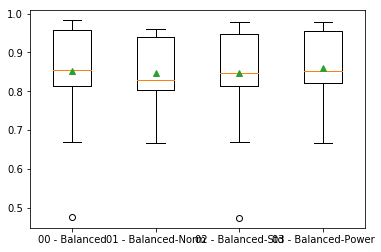

In [57]:
pyplot.boxplot( results , labels = names , showmeans = True )

pyplot.show()